## Estimativa inicial da transformação espaço-objeto para espaço-imagem

O plano epipolar:

<img src="data/epipolarGeometry.png" > 

Seja um par estereoscópico, com uma câmera à esquerda com a matriz da câmera $K_l$ e uma câmera à direita com a matriz da câmera $K_r$. A câmera à direita está transladada pelo vetor $\mathbf{t} \ (t_x, t_y, t_z)$ e rotacionada pela matriz $R$, ou seja:

$\mathbf{x_l} = R \mathbf{x_r} + \mathbf{t} \ \ \ \ \ (1) $ 

Objetiva-se encontrar uma estimativa para as matrizes das projeções $P_l$ e $P_r$.

#### A matriz essencial $E$

Podemos obter as coordenadas 2D $\mathbf{u_l}\ (u_{l},v_{l})$ e $\mathbf{u_r}\ (u_{r},v_{r})$ a partir das coordenadas 3D $\mathbf{x_l} \ (x_{l},y_{l},z_{l})$ e $\mathbf{x_r}\  (x_{r},y_{r},z_{r})$ com:

Para a câmera da esquerda:

$z_l \begin{bmatrix} u_l\\v_l\\1\end{bmatrix} = 
\begin{bmatrix} f_x^{(l)}&0&c_x^{(l)}\\0&f_y^{(l)}&c_y^{(l)}\\0&0&1\end{bmatrix}
\begin{bmatrix} x_l\\y_l\\z_l\end{bmatrix} \rightarrow \mathbf{x_l} = z_l\mathbf{u_l}K_l^{-1}  \ \ \ \ (2)
$

Para a câmera da direita:

$z_r \begin{bmatrix} u_r\\v_r\\1\end{bmatrix} = 
\begin{bmatrix} f_x^{(r)}&0&c_x^{(r)}\\0&f_y^{(r)}&c_y^{(r)}\\0&0&1\end{bmatrix}
\begin{bmatrix} x_r\\y_r\\z_r\end{bmatrix} \rightarrow \mathbf{x_r} = z_r\mathbf{u_r}K_r^{-1}   \ \ \ \ (3)
$

A <u>restrição epipolar</u> aponta que temos em um mesmo plano  $\mathbf{x}_l$ e $\mathbf{t}$, assim o vetor $\mathbf{t} \times \mathbf{x_l}$ é a normal deste plano fazendo o ângulo de 90º com este e portanto:

$\mathbf{x_l} \cdot (\mathbf{t} \times \mathbf{x_l}) = 0$

Reescrevendo o vetor de translação $\mathbf{t}$ em uma nova forma matricial, pode-se reescrever a equação acima:

$\begin{bmatrix} x_l&y_l&z_l\end{bmatrix}
\begin{bmatrix} 0& -t_z & t_y\\t_z& 0 & -t_x \\ -t_y & t_x & 0\end{bmatrix}
\begin{bmatrix} x_l\\y_l\\z_l\end{bmatrix} = 0 \rightarrow
$

$\mathbf{x_l^T}S\mathbf{x_l}= 0
$

Utilizando a equação (1):

$\mathbf{x_l^T}S(R\mathbf{x_r} + \mathbf{t}) = 0 \rightarrow $

$\mathbf{x_l^T}\underbrace{SR}_{E}\mathbf{x_r}= 0   \ \ \ \ (4)$

Onde a matriz $E$ é chamada matriz essencial. Dentre suas propriedadesm verifica-se que ela é $3 \times 3$ com 5 graus de liberdade, com dois autovalores iguais entre si e o terceiro é zero. Uma decomposição útil de $E$ que pode levar até $S$ e $R$ é:

$E = Udiag(1,1,0)V^T$

#### A matriz fundamental $F$

A relação acima ainda não é tão útil pois, na prática não sabe-se as coordenadas 3D dos objetos, e sim as coordenadas 2D do objeto em imagens diferentes, ou seja, geralmente sabe-se $\mathbf{u_l}\ (u_{l},v_{l})$ e $\mathbf{u_r}\ (u_{r},v_{r})$ de um determinado alvo.

Substituindo as equações (2) e (3) em (4), tem-se que:

$\mathbf{u_l}^T \underbrace{K_l^{-T} E K_r^{-1}}_{F} \mathbf{u_r} = 0$

A matriz $F$ é chamada de matriz fundamental e guarda toda a relação do par estereoscópico.

#### Método para cálculo de $P_r$

1) Com um conjunto de $n$ correspondênicas $(u_l, v_l, u_r, v_r)$, resolver: $\mathbf{u_l}^T F \mathbf{u_r}=0$.

2) Calcular a matriz Essencial: $E = K_l^T F K_r$

3) Realizar decomposição em valores singulares (SVD) em $E$ para fatorá-la e em uma matriz anti-simétrica (no caso $S$) e em uma matriz ortonormal (no caso $R$). 

4) Extrair os elementos de $\mathbf{t}$ de $S$: $t_x = -S_{2,3}$, $t_y = S_{1,3}$ e $t_z = -S_{1,2}$.

5) $P_r = K_r[R|\mathbf{t}]$

#### Método para cálculo de $P_l$

1) Assume-se a câmera da esquerda como sistema de referência do espaço-objeto em um primeiro momento, assim: $P_l = K_l[I|0]$

2) Tendo-se $T_l = {}_{l}[T]_{W}$, ou seja a transformação do sistema de referência do espaço-objeto para o sistema de referência da câmera da esquerda: $P_l = K_l \cdot {}_{l}[T]_{W}$

2) Após encontrar ${}_{l}[T]_{r}$ pelo método anterior, obtêm-se $T_r = {}_{r}[T]_{W} = {}_{l}[T]_{r}^{-1} \cdot {}_{l}[T]_{W}$

#### Uma solução para $F$

A matriz fundamental $F$ encapsula a geometria intrínseca. Sendo ela uma matriz $3\times 3$ de posto 2. 

Se um ponto 3D $X$ é projetado como ${\mathbf{u_l}}$ no ponto de vista da câmera 1 e projetado em $\mathbf{u_r}$ no segundo ponto de vista, então temos a seguinte relação:

$
\mathbf{u_l}^T [F] \mathbf{u_r}=0
$

Cada par de pontos correspondentes dá origem a uma equação linear:

$
\begin{bmatrix}
u_l & v_l & 1
\end{bmatrix}
\begin{bmatrix}
F_{11} & F_{12} & F_{13}\\
F_{21} & F_{22} & F_{23}\\
F_{31} & F_{32} & F_{33}
\end{bmatrix}
\begin{bmatrix}
u_r\\
v_r\\
1
\end{bmatrix} =0  \rightarrow
\begin{bmatrix}
u_l F_{11} u_r + u_l F_{12} v_r + u_l F_{13}\\
v_l F_{21} u_r + v_l F_{22} v_r + v_l F_{23}\\
F_{31} u_r + F_{32} v_r + F_{33}
\end{bmatrix} = 
\begin{bmatrix}
0  \\
0  \\
0
\end{bmatrix}
$

Que pode ser remanejado em uma única equação da seguinte forma:

$
u_l F_{11} u_r + u_l F_{12} v_r + u_l F_{13} + v_l F_{21} u_r + v_l F_{22} v_r + v_l F_{23} + F_{31} u_r + F_{32} v_r + F_{33} = 0
$

Organizando $F_{ij}$ em produto escalar:

$
\begin{bmatrix}
u_l u_r & u_l  v_r & u_l & v_l u_r & v_l v_r & v_l &  u_r & v_r & 1
\end{bmatrix}
\begin{bmatrix}
F_{11} \\
F_{12} \\
F_{13} \\
F_{21} \\
F_{22} \\
F_{23} \\
F_{31} \\
F_{32} \\
F_{33} \\
\end{bmatrix}
= 0
$

Que para um conjunto de $n$ correspondências tem-se:

$
\begin{bmatrix}
u^1_l u^1_r & u^1_l v^1_r & u^1_l & v^1_l u^1_r & v^1_l v^1_r & v^1_l & u^1_r & v^1_r & 1 \\
& & & &\vdots \\
u^n_l u^n_r & u^n_l v^n_r & u^n_l & v^n_l u^n_r & v^n_l v^n_r & v^n_l & u^n_r & v^n_r & 1
\end{bmatrix}
\begin{bmatrix}
F_{11} \\
F_{12} \\
F_{13} \\
F_{21} \\
F_{22} \\
F_{23} \\
F_{31} \\
F_{32} \\
F_{33} \\
\end{bmatrix}
= 0 \rightarrow
A \mathbf{f} = 0
$

Chegando ao problema de ajustamento tal que:

$A \mathbf{f_a} = V $


Onde $V$ é um vetor de resíduos (erros) a ser minimizado pelo método MMQ ($\Phi = V^T V = mín$), assim:

$\Phi = V^T V = mín$

$\Phi = {\bf f_a}^T A^T A {\bf f_a} = mín$

Acrescenta-se a condição $||\mathbf{f}||^2 = 1$ para evitar a soução trivial e a para definir uma escala temporária para o problema, Assim acrescenta-se um novo termo de regularização $\lambda$ por conveniência:

$\mathbf{f_a}^T\mathbf{f_a}-1  \approx 0 $

$\lambda(\mathbf{f_a}^T\mathbf{f_a}-1) I = mín $

Uma equação de custo a ser minimizada com as duas restrições:

$\mathcal{L} = \mathbf{f_a}^T A^T A \mathbf{f_a} - \lambda(\mathbf{f_a}^T\mathbf{f_a}-1) I = mín $

Aqui, $\lambda$ é chamado de multiplicador de Lagrange, reforçando que $||\mathbf{f}||^2 = 1$.


Igualando a 0 a derivada da equação $\mathcal{L}$ espera-se encontrar seu mínimo:

$\frac{d \mathcal{L}}{d \mathbf{f}} = 2 A^T A \mathbf{f_a} -2 \lambda \mathbf{f_a} = 0 $

$A^T A \mathbf{f_a} =\lambda \mathbf{f_a}$

Que é um problema de autovalores, onde o espaço nulo de $A^TA$ é aproximado como o autovetor $\mathbf{f_a}$ correspondente ao menor autovalor $\lambda$.

#### Fatoração de $E$

Aplicando SVD em $E$, obtém-se:

$E = U \Sigma V^T$

No caso, $E$ é apenas uma matriz quadrada 3×3 com determinante positivo cujas entradas são meros números reais, então $U, V^T,$ e $\Sigma$ são matrizes 3×3 também de números reais, $\Sigma$ pode ser vista como uma matriz de escala, e $U$ e $V^T$ podem ser vistas como matrizes de rotação. A expressão pode ser interpretada intuitivamente como uma composição (ou sequência) de três transformações geométricas: uma rotação, uma escala, e outra rotação.

Para obter-se $R$ e $\mathbf{t}$, primeiramente são montadas matrizes auxiliares $W$, $Z$ e $X$ tais que:

$W = \begin{bmatrix} 0 & -1 & 0 \\1 & 0 & 0 \\ 0 & 0 & 1 \end{bmatrix}\ $ , $\ Z = \begin{bmatrix} 0 & 1 & 0 \\-1 & 0 & 0 \\ 0 & 0 & 0 \end{bmatrix}\ $  e  $\ ZX = \pm diag(1, 1, 0)$

Onde $W$ é ortonormal, $Z$ anti-simétrica e $X = W$ ou $X=W^T$ ortonormal . 

Além disso, devido as propriedades homogêneas de $E$ e de seus autovalores, pode-se pode-se assumir a seguinte versão da decomposição SVD:

$E = U diag(1,1,0)V^T = U(ZX)V^T = U(ZU^TUX)V^T = (UZU^T)(UXV^T) = SR$

Assim:

$S = UZU^T$ e 

$R = U W^TV^T$ ou $R = U WV^T $

Sabendo que por construção, $S\mathbf{t}=0$, segue-se que:

$\mathbf{t} = \pm \ \ U(0 \ \ \ \ 0 \ \ \ \ 1)^T$

Tem-se então duas versões para $R$, duas versões pra $\mathbf{t}$ e portanto quatro versões para $P_r$:

$P_r = K_r[R_1|t_1]$

$P_r = K_r[R_1|t_2]$

$P_r = K_r[R_2|t_1]$

$P_r = K_r[R_2|t_2]$

"Testar um simples ponto para determinar se ele se encontra na frente das duas câmeras é o suficiente para decidir entre a 4 soluções possíveis." (HARTLEY; ZISSERMAN, 2003)

### Exemplo

Considere o padrão 3D em fomato de cubos empilhados, cada cubinho tem aresta 1.

In [1]:
import open3d as o3d
import numpy as np
import copy

colors = {
    'white':  [1.0, 1.0, 1.0],
    'yellow': [1.0, 1.0, 0.0],
    'red':    [1.0, 0.0, 0.0],
    'orange': [1.0, 0.5, 0.0],
    'blue':   [0.0, 0.0, 1.0],
    'green':  [0.0, 1.0, 0.0],
    'black':  [0.0, 0.0, 0.0]
}

points = [
    [0, 0, 0], # P0 z = 0, face azul vermelha
    [1, 0, 0], # P1
    [2, 0, 0], # P2
    [2, 1, 0], # P3
    [1, 1, 0], # P4
    [0, 1, 0], # P5
    [0, 2, 0], # P6
    [1, 2, 0], # P7
    [2, 2, 0], # P8
    [0, 0, 1], # P9
    [1, 0, 1], # P10
    [2, 0, 1], # P11
    [2, 1, 1], # P12
    [1, 1, 1], # P13 interno
    [0, 1, 1], # P14
    [0, 2, 1], # P15
    [1, 2, 1], # P16
    [2, 2, 1], # P17
    [0, 0, 2], # P18 z = 2, face amarelo e verde
    [1, 0, 2], # P19
    [2, 0, 2], # P20
    [2, 1, 2], # P21
    [1, 1, 2], # P22
    [0, 1, 2], # P23
    [0, 2, 2], # P24
    [1, 2, 2], # P25
    [2, 2, 2], # P26
]

pcd = o3d.geometry.PointCloud()
point_cloud = np.asarray(np.array(points))
pcd.points = o3d.utility.Vector3dVector(point_cloud)
pcd.colors = o3d.utility.Vector3dVector([[0,0,0] for i in range(len(pcd.points))])

##### Gerar o volume do cubo para ofuscar os pontos atrás do cubo
def create_box(tx,ty,tz, color=colors["white"]):
    mesh_box = o3d.geometry.TriangleMesh.create_box(width=1,
                                                    height=1,
                                                    depth=1)
    mesh_box.compute_vertex_normals()
    mesh_box.compute_triangle_normals()

    # Get triangle data
    triangles = np.asarray(mesh_box.triangles)
    vertices = np.asarray(mesh_box.vertices)
    normals = np.asarray(mesh_box.triangle_normals)

    # Expand: one triangle = three new unique vertices
    new_vertices = []
    new_triangles = []
    new_colors = []

    for i, tri in enumerate(triangles):
        for j in range(3):
            new_vertices.append(vertices[tri[j]])
            new_colors.append(color)  # normalize [-1,1] to [0,1]
        new_triangles.append([3*i, 3*i + 1, 3*i + 2])

    #### Create new mesh with duplicated vertices
    colored_mesh = o3d.geometry.TriangleMesh()
    colored_mesh.vertices = o3d.utility.Vector3dVector(new_vertices)
    colored_mesh.triangles = o3d.utility.Vector3iVector(new_triangles)
    colored_mesh.vertex_colors = o3d.utility.Vector3dVector(new_colors)

    colored_mesh_translated = copy.deepcopy(colored_mesh).translate((tx, ty, tz))
    return colored_mesh_translated

cube1 = create_box(0,0,0, colors["red"])
cube2 = create_box(0,1,0)
cube3 = create_box(0,1,1, colors["yellow"])
cube4 = create_box(1,1,1)
cube5 = create_box(1,0,0)
cube6 = create_box(1,1,0, colors["blue"])
cube7 = create_box(0,0,1)
cube8 = create_box(1,0,1, colors["green"])

#### Eixos X(red arrow), Y(green arrow), Z(blue arrow)
mesh_frame = o3d.geometry.TriangleMesh.create_coordinate_frame( size=0.4, origin=[0, 0, 0])

o3d.visualization.draw_geometries([pcd, cube1, cube2, cube3, cube4, cube5, 
                                   cube6, cube7, cube8, mesh_frame] ,
                                   width=1024, height=768, zoom=1, mesh_show_wireframe =True )

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


Nesta câmera simulada, não precisa-se modelar distorções. Podemos obter as coordenadas dos pontos coorespondentes em um par estereoscópico para obter $F$, $E$, $R$, $\mathbf{t}$ e consequentemente a matriz de parâmetros extrínsecos $T= [R|\mathbf{t}]$. Para isso foram retirada duas fotografias:

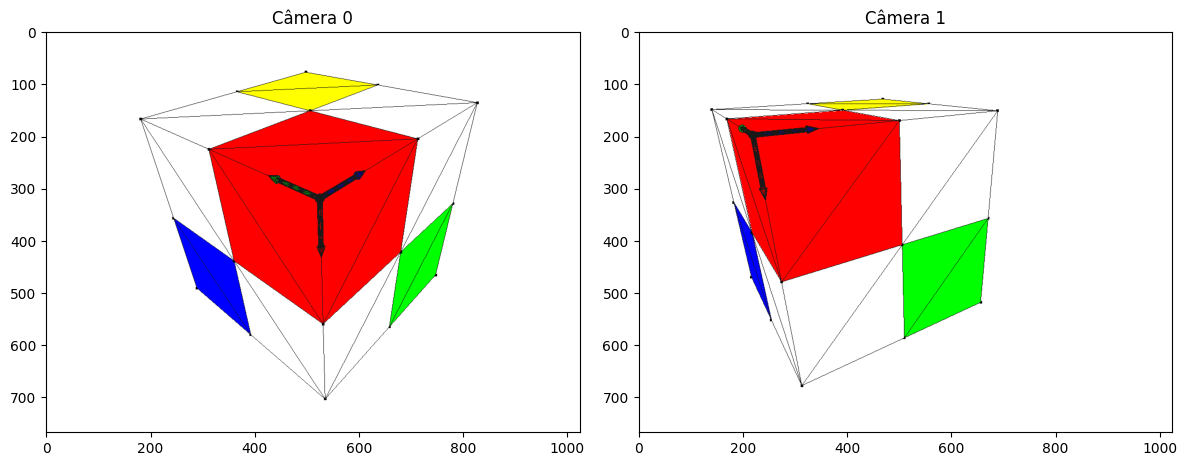

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the images
img0 = mpimg.imread(f'aux_data/ScreenCapture_3Dpattern.png')
img1 = mpimg.imread(f'aux_data/ScreenCapture_3Dpattern2.png')

# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 2, figsize=(12,8))

# Display image
ax[0].imshow(img0)
ax[0].set_title(f'Câmera {0}')

ax[1].imshow(img1)
ax[1].set_title(f'Câmera {1}')

# Adjust layout
plt.tight_layout()
plt.show()

Onde observa-se $19$ pontos no espaço-objeto tais que suas coordenadas 2D podem ser adquiridas em ambas as imagens. 

Já sabemos a priori o resultado que desejamos chegar:

In [3]:
import json
import numpy as np

# Load the json
camera0 = json.load(open(f"aux_data/ScreenCamera_3Dpattern.json"))
camera1 = json.load(open(f"aux_data/ScreenCamera_3Dpattern2.json"))

## Camera 0 
# Load the T
Tl = np.array(camera0['extrinsic'], dtype=float).reshape(4,4).T

# Load K
Kl = np.array(camera0['intrinsic']['intrinsic_matrix'], dtype=float).reshape(3,3).T
Kl = np.hstack( (Kl, [[0],[0],[0]] ) )
# Calculate P
Pl = Kl @ Tl

# show T
print(f"l_T_W:\n", Tl)

# show K
print(f"K0:\n", Kl)

# show P
print(f"P0:\n", Pl)

## Camera 1 
# Load the T
Tr = np.array(camera1['extrinsic'], dtype=float).reshape(4,4).T

# Load K
Kr = np.array(camera1['intrinsic']['intrinsic_matrix'], dtype=float).reshape(3,3).T
Kr = np.hstack( (Kr, [[0],[0],[0]] ) )

# Calculate P
Pr = Kr @ Tr

# show T
print(f"r_T_W:\n", Tr)

# show K
print(f"K1:\n", Kr)

# show P
print(f"Pr:\n", Pr)


l_T_W:
 [[ 0.03476902 -0.73576626  0.67634246  0.03457177]
 [ 0.80117304 -0.3840305  -0.45895787 -0.16866854]
 [ 0.59742185  0.55782486  0.57612373  1.77597073]
 [ 0.          0.          0.          1.        ]]
K0:
 [[665.10751011   0.         511.5          0.        ]
 [  0.         665.10751011 383.5          0.        ]
 [  0.           0.           1.           0.        ]]
P0:
 [[ 3.28706413e+02 -2.04036252e+02  7.44527737e+02  9.31402971e+02]
 [ 7.61977489e+02 -4.14957389e+01 -8.43128727e+01  5.68902061e+02]
 [ 5.97421851e-01  5.57824861e-01  5.76123734e-01  1.77597073e+00]]
r_T_W:
 [[ 0.01609996 -0.54617987  0.83751319 -0.88523886]
 [ 0.90840811 -0.3419922  -0.24049125 -0.55647321]
 [ 0.41777446  0.76467567  0.49064816  2.00432884]
 [ 0.          0.          0.          1.        ]]
K1:
 [[665.10751011   0.         511.5          0.        ]
 [  0.         665.10751011 383.5          0.        ]
 [  0.           0.           1.           0.        ]]
Pr:
 [[2.24399843e+02 2.7

As coordenadas dos pixels correspondentes $\mathbf{u_{nk}}$ para $n=0,1$ e $k=0,...,18$ :

In [4]:
k = 19

X_k = np.zeros((k,3))
X_k[0] = [0, 0, 0] # P0 origem
X_k[1] = [0, 0, 1] # P1
X_k[2] = [1, 0, 1] # P2 ligação vermelho-verde
X_k[3] = [1, 0, 0] # P3
X_k[4] = [1, 1, 0] # P4 ligação vermelho-azul
X_k[5] = [0, 1, 0] # P5
X_k[6] = [0, 1, 1] # P6 ligação vermelho-amarelo
X_k[7] = [0, 2, 0] # P7 ponto mais esquerdo
X_k[8] = [0, 2, 1] # P8
X_k[9] = [0, 2, 2] # P9 ponto mais superior
X_k[10] = [0, 1, 2] # P10
X_k[11] = [0, 0, 2] # P11 ponto mais direito
X_k[12] = [1, 0, 2] # P12
X_k[13] = [2, 0, 2] # P13
X_k[14] = [2, 0, 1] # P14
X_k[15] = [2, 0, 0] # P15 ponto mais inferior
X_k[16] = [2, 1, 0] # P16
X_k[17] = [2, 2, 0] # P17
X_k[18] = [1, 2, 0] # P18

u_nk = np.zeros((2,k,2))

# para a camera 0  - Left
u_nk[0,0] = [525,320]  # P0 origem
u_nk[0,1] = [713,206]
u_nk[0,2] = [680,423]  # P2 ligação vermelho-verde
u_nk[0,3] = [531,561]
u_nk[0,4] = [360,440]  # P4 ligação vermelho-azul
u_nk[0,5] = [312,226]
u_nk[0,6] = [506,152]  # P6 ligação vermelho-amarelo
u_nk[0,7] = [181,168]  # P7 ponto mais esquerdo
u_nk[0,8] = [367,115]
u_nk[0,9] = [498,78]   # P9 ponto mais superior
u_nk[0,10] = [636,103]
u_nk[0,11] = [827,137] # P11 ponto mais direito
u_nk[0,12] = [780,330]
u_nk[0,13] = [747,467]
u_nk[0,14] = [658,566]
u_nk[0,15] = [535,704] # P15 ponto mais inferior
u_nk[0,16] = [392,581]
u_nk[0,17] = [289,492]
u_nk[0,18] = [244,358]

# para a camera 1 - Right
u_nk[1,0] = [219,199]  # P0 origem
u_nk[1,1] = [499,171]
u_nk[1,2] = [504,409]  # P2 ligação vermelho-verde
u_nk[1,3] = [273,480 ]
u_nk[1,4] = [216,386]  # P4 ligação vermelho-azul
u_nk[1,5] = [168,168]
u_nk[1,6] = [390,151]  # P6 ligação vermelho-amarelo
u_nk[1,7] = [139,150]  # P7 ponto mais esquerdo
u_nk[1,8] = [325,139]
u_nk[1,9] = [467,129]   # P9 ponto mais superior
u_nk[1,10] = [555,139]
u_nk[1,11] = [687,152] # P11 ponto mais direito
u_nk[1,12] = [669,358]
u_nk[1,13] = [655,519]
u_nk[1,14] = [508,587]
u_nk[1,15] = [312,679] # P15 ponto mais inferior
u_nk[1,16] = [253,553] 
u_nk[1,17] = [215,471]
u_nk[1,18] = [181,328]


Ajustamento para obtenção de $F$

In [5]:
A = []
for k in range(0,19):
    X, Y, Z = X_k[k]
    u_l, v_l = u_nk[0,k]
    u_r, v_r = u_nk[1,k]
    if len(A) == 0:
        A = np.array([[u_l*u_r, u_l*v_r, u_l, v_l*u_r, v_l*v_r, v_l, u_r, v_r, 1]], dtype=float)
    else: 
        aux = np.array([[u_l*u_r, u_l*v_r, u_l, v_l*u_r, v_l*v_r, v_l, u_r, v_r, 1]], dtype=float)
        A = np.vstack((A, aux))

print("A.shape", A.shape, f" / Esperado (kx9) = {19}x{9}")

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A.T @ A)

# Find the index of the minimum eigenvalue
min_index = np.argmin(eigenvalues)

# Get the minimum eigenvalue and corresponding eigenvector
min_eigenvalue = eigenvalues[min_index]
min_eigenvector = eigenvectors[:, min_index]

# Remove the imaginary part if exists
min_eigenvector = np.real(min_eigenvector)

F_calc = min_eigenvector.reshape((3,3))
# show F Calc
print(f"F:\n", F_calc)

A.shape (19, 9)  / Esperado (kx9) = 19x9
F:
 [[ 3.31416884e-05  1.55980131e-06  7.77004203e-02]
 [-3.34380647e-05 -6.80200011e-05 -1.73581777e-01]
 [-1.31653801e-01  2.27656640e-01  9.45870887e-01]]


Comparação com a implementação do openCV

In [6]:
import cv2

F_calc, mask = cv2.findFundamentalMat(u_nk[0,:], u_nk[1,:], method=cv2.FM_RANSAC)

print("Fundamental Matrix:\n", F_calc)

Fundamental Matrix:
 [[ 3.14197779e-04 -2.80148184e-04 -1.21732258e+00]
 [-2.85237045e-05 -6.35715112e-04  2.09752085e+00]
 [ 7.21655152e-01 -1.57409909e+00  1.00000000e+00]]


Cálculo de $E$

In [7]:
E = Kl[:3,:3].T @ F_calc @ Kl[:3,:3]
print(f"E:\n", E)

E:
 [[  138.99104308  -123.92859186  -774.21656765]
 [  -12.61797412  -281.22002264  1223.22198729]
 [  579.5936236  -1304.40328602  -123.64258392]]


Fatoração de $E$

In [ ]:
import cv2

def decompose_E(E):
    U, Sigma, Vt = np.linalg.svd(E, full_matrices=True)
    Z = np.array([[0,1,0],[-1,0,0],[0,0,0]])
    W = np.array([[0,-1,0],[1,0,0],[0,0,1]])
    S = U @ Z @ U.T

    t = np.array([[-S[1,2]],[S[0,2]],[-S[0,1]]])
    R2 = U @ W.T @ Vt
    R1 = U @ W @ Vt
    return R1, R2 ,t

def test_four_P(E, q1=u_nk[0,:], q2=u_nk[1,:], K= Kl):
        """
        Decompose the Essential matrix

        Parameters
        ----------
        E (ndarray): Essential matrix
        q1 (ndarray): The good keypoints matches position in i-1'th image
        q2 (ndarray): The good keypoints matches position in i'th image

        Returns
        -------
        right_pair (list): Contains the rotation matrix and translation vector
        """

        R1, R2, t = decompose_E(E)
        T1 = np.vstack( (np.hstack((R1,t)) , [0,0,0,1]) )
        T2 = np.vstack( (np.hstack((R2,t)) , [0,0,0,1]) )
        T3 = np.vstack( (np.hstack((R1,-t)) , [0,0,0,1]) )
        T4 = np.vstack( (np.hstack((R2,-t)) , [0,0,0,1]) )
        translations = [ T1, T2, T3, T4 ]
        
        # List of projections
        projections = [K @ T1, K @ T2, K @ T3, K @ T4]

        positive_depths = []
        for P in projections:
            X_w_pred_homogen = cv2.triangulatePoints(P, P, q1.T, q2.T)
            
            # Un-homogenize
            X_k_pred = X_w_pred_homogen / X_w_pred_homogen[3]

            # get Z coordinate
            depths = X_k_pred[2, :]

            # Procuramos a transformação que leva a um maior número de
            # profundidades positivas, afinal, os pontos 3D considerados estão
            # na frente das duas câmeras. 
            # Descomente abaixo pra checar que algumas transformações levam a 
            # coordenads Z negativas
            
            # print(depths)

            total_sum = sum(depths < 0)
            positive_depths.append(total_sum)

        print("Soma de profundidades positivas: \n", positive_depths)
        # Decompose the Essential matrix using built in OpenCV function
        # Form the 4 possible transformation matrix T from R1, R2, and t
        # Create projection matrix using each T, and triangulate points hom_Q1
        # Transform hom_Q1 to second camera using T to create hom_Q2
        # Count how many points in hom_Q1 and hom_Q2 with positive z value
        # Return R and t pair which resulted in the most points with positive z

        max = np.argmax(positive_depths)
        if (max == 2):
            return T3 #R1, np.ndarray.flatten(-t)
        elif (max == 3):
            return T4 #R2, np.ndarray.flatten(-t)
        elif (max == 0):
            return T1 #R1, np.ndarray.flatten(t)
        elif (max == 1):
            return T2 #R2, np.ndarray.flatten(t)
l_T_r_calc = test_four_P(E)


[[-0.91272373 -0.91272373 -0.91272373 -0.91272373 -0.91272373 -0.91272373
  -0.91272373 -0.91272373 -0.91272373 -0.91272373 -0.91272373 -0.91272373
  -0.91272373 -0.91272373 -0.91272373 -0.91272373 -0.91272373 -0.91272373
  -0.91272373]
 [-0.39603341 -0.39603341 -0.39603341 -0.39603341 -0.39603341 -0.39603341
  -0.39603341 -0.39603341 -0.39603341 -0.39603341 -0.39603341 -0.39603341
  -0.39603341 -0.39603341 -0.39603341 -0.39603341 -0.39603341 -0.39603341
  -0.39603341]
 [-0.10046357 -0.10046357 -0.10046357 -0.10046357 -0.10046357 -0.10046357
  -0.10046357 -0.10046357 -0.10046357 -0.10046357 -0.10046357 -0.10046357
  -0.10046357 -0.10046357 -0.10046357 -0.10046357 -0.10046357 -0.10046357
  -0.10046357]
 [ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.        ]]
[[-0.91272373 -0.91272373 -0.91272373 -0.91272373 -0.91272373 -0.91272373
 

In [22]:
l_T_r_calc = test_four_P(E)

l_T_W = Tl

r_T_W = np.linalg.inv(l_T_r_calc) @ l_T_W

P_r_calc = Kl @ r_T_W

# Teste se o ponto X [0,0,0] está sendo visado pela câmera (sabe-se que sim)
X = np.array([0,0,0,1])

# Testes:
x1 = P_r_calc @ X
x1 = np.round(x1/x1[2],2)
print(x1)

# Correto:
x = Pr @ X
x = np.round(x/x[2],2)
print(x)


[[ 0.56357738  0.82547074 -0.03128261  0.83816168]
 [ 0.81770404 -0.56284795 -0.12067429  0.51130793]
 [-0.11722045  0.04242939 -0.99219913 -0.1898663 ]
 [ 0.          0.          0.          1.        ]] [[219. 499. 504. 273. 216. 168. 390. 139. 325. 467. 555. 687. 669. 655.
  508. 312. 253. 215. 181.]
 [199. 171. 409. 480. 386. 168. 151. 150. 139. 129. 139. 152. 358. 519.
  587. 679. 553. 471. 328.]
 [  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
    1.   1.   1.   1.   1.]]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)